In [63]:
options(stringsAsFactors = FALSE)
suppressMessages({
  library(dplyr)
  library(readr)
  library(ggplot2)
  library(ggsci)
  library(Seurat)
  library(scales)
  library(reshape2)

  library(IsoformSwitchAnalyzeR)
  library(BSgenome.Hsapiens.UCSC.hg38)
  library(Biostrings)

  library(pheatmap)
})

In [64]:
mytheme <- ggplot2::theme(
  plot.background = element_blank(),
  panel.background = element_rect(fill = "#FFFFFF"),
  legend.background = element_blank(),
  legend.box.background = element_blank(),
  panel.border = element_rect(linetype = "solid", colour = "black", fill = NA, size = 0.5),
  panel.grid.major = element_blank(), # element_line(colour = "#f0f0f0", linetype = "dashed"),
  panel.grid.minor = element_blank(),
  axis.line = element_blank(), axis.text = element_text(colour = "black")
)

color <- c(c(pal_d3("category20")(20), "#B52D73", "#4347B5", "#4FED28", "#402727", "#48959C", "#FC6262", "#4A9EFF", "#9E969E"))

In [185]:
ont <- readRDS(file = "/gpfs1/tangfuchou_pkuhpc/tangfuchou_cls/luping/project/ont_iso_crc/2_RNA_CRC/01_RNA_analysis/CRC_HTCRC_02_RNA_seurat/CRC_HTCRC_01_RNA_5400_3262_tx/00_tx_5400_3262_hvg1869_PC1_20.rds")

In [11]:
df_dtu <- read.table(file = "../02_DTU_tx_each_patient_final_DTUgenes.txt", header = T, sep = "\t", check.names = F)

#  boxplot (log2(TPM+1) and Proportion)

## THAP4

In [8]:
(df_dtu %>% filter(GeneName %in% "THAP4", TranName %in% "THAP4-204") %>% arrange(patient))

GeneID,TranID,TranName,GeneName,patient,ave_tx_Prop_stemTAlike_minus_stemTA,max_in_allpatients,max(Stem/TA-like-Stem/TA),DTU_tx_nPatients,DTU_gene_nPatients,⋯,tx_LoVo,tx_SW480,gene_HCT116,gene_HT29,gene_LoVo,gene_SW480,P_ave_tx_Prop_stemTAlike_minus_stemTA,P_tx_npatients,P_tx_ntx,DTU_tx_nPatients_1
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC01,0.838,0.5990296,-0.5990296,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC02,0.474,0.5990296,-0.5826341,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC03,0.371,0.5990296,-0.3683397,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC04,0.414,0.5990296,-0.5883947,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC05,0.554,0.5990296,-0.5950333,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC07,0.377,0.5990296,-0.4539779,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC08,0.554,0.5990296,-0.5165198,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC09,0.339,0.5990296,-0.4848324,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10
ENSG00000176946,ENST00000407315,THAP4-204,THAP4,CRC10,0.232,0.5990296,-0.3929876,10,10,⋯,51.19614,42.60499,38.86657,42.38607,51.53252,43.10456,0.4291,10,2,10


In [19]:
df_tpm_prop <- read_table(file = "../00_tx_tpm_prop_LongFormat_in_celltype3_each_patient.txt") %>%
  filter(TranName %in% c("THAP4-204", "THAP4-202"), patient %in% c(
    c("CRC01", "CRC02", "CRC03", "CRC04", "CRC05", "CRC07", "CRC8", "CRC09", "CRC10")
  )) %>%
  as.data.frame() %>%
  filter(!is.na(Proportion))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  TranName = col_character(),
  CellName = col_character(),
  TPM = col_double(),
  patient = col_character(),
  celltype3_1 = col_character(),
  data = col_character(),
  GeneName = col_character(),
  Proportion = col_double()
)



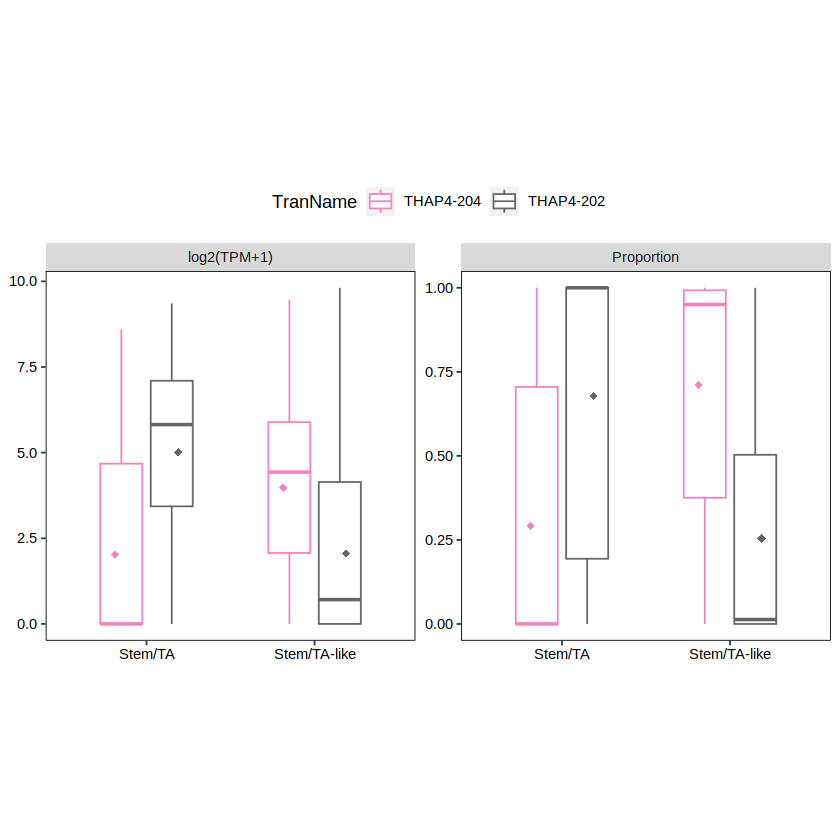

In [20]:
df_plot <- df_tpm_prop
df_plot$TPM <- log2(df_plot$TPM + 1)
df_plot <- df_plot[, c("TranName", "CellName", "patient", "celltype3_1", "data", "TPM", "Proportion")]
colnames(df_plot) <- c("TranName", "CellName", "patient", "celltype3_1", "data", "log2(TPM+1)", "Proportion")
df_plot <- melt(df_plot, id = c("TranName", "CellName", "patient", "celltype3_1", "data"))
df_plot$celltype <- sapply(strsplit(df_plot$celltype3_1, split = "_"), function(x) {
  x[1]
})
df_plot$TranName <- factor(as.character(df_plot$TranName), levels = c("THAP4-204", "THAP4-202"))
df_plot$variable <- factor(as.character(df_plot$variable), levels = c("log2(TPM+1)", "Proportion")) # TPM is log2(TPM+1)
ggplot(df_plot, aes(x = celltype, y = value, color = TranName)) +
  geom_boxplot(outlier.shape = NA, position = position_dodge(0.6), width = 0.5) + # coord_flip()+
  stat_summary(fun.y = mean, position = position_dodge(0.75), geom = "point", shape = 18, size = 2, show.legend = FALSE) +
  scale_color_manual(values = rev(c("#4daf4a", "#377eb8", "#666666", "#f781bf"))) +
  facet_wrap(~variable, scales = "free") +
  mytheme +
  theme(aspect.ratio = 1, legend.position = "top", axis.title = element_blank())
ggsave(file = "02_barplot_THAP4.pdf", width = 4, height = 3)

## MYC

In [51]:
(df_dtu %>% filter(GeneName %in% "MYC", TranName %in% "MYC-206") %>% arrange(patient))

GeneID,TranID,TranName,GeneName,patient,ave_tx_Prop_stemTAlike_minus_stemTA,max_in_allpatients,max(Stem/TA-like-Stem/TA),DTU_tx_nPatients,DTU_gene_nPatients,⋯,tx_LoVo,tx_SW480,gene_HCT116,gene_HT29,gene_LoVo,gene_SW480,P_ave_tx_Prop_stemTAlike_minus_stemTA,P_tx_npatients,P_tx_ntx,DTU_tx_nPatients_1
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
ENSG00000136997,ENST00000621592,MYC-206,MYC,CRC01,-0.286,0.3453979,0.2544570,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,CRC02,-0.655,0.3453979,-0.2372174,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,CRC04,-0.290,0.3453979,-0.2599011,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,CRC05,-0.222,0.3453979,-0.2538613,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,CRC09,-0.274,0.3453979,0.1773402,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,CRC10,-0.217,0.3453979,-0.1818549,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,HTCRC01,-0.593,0.3453979,-0.2032201,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,HTCRC04,0.207,0.3453979,-0.3453979,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9
ENSG00000136997,ENST00000621592,MYC-206,MYC,HTCRC05,-0.105,0.3453979,-0.2198064,10,10,⋯,7.796734,7.12143,206.4205,183.6363,201.4254,135.0382,-0.2705556,10,2,9


In [49]:
(df_dtu %>% filter(GeneName %in% "MYC", TranName %in% "MYC-202") %>% arrange(patient))

GeneID,TranID,TranName,GeneName,patient,ave_tx_Prop_stemTAlike_minus_stemTA,max_in_allpatients,max(Stem/TA-like-Stem/TA),DTU_tx_nPatients,DTU_gene_nPatients,⋯,tx_LoVo,tx_SW480,gene_HCT116,gene_HT29,gene_LoVo,gene_SW480,P_ave_tx_Prop_stemTAlike_minus_stemTA,P_tx_npatients,P_tx_ntx,DTU_tx_nPatients_1
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC01,0.210,0.3453979,0.2544570,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC02,0.527,0.3453979,-0.2372174,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC04,0.242,0.3453979,-0.2599011,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC05,0.211,0.3453979,-0.2538613,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC08,0.423,0.3453979,0.1663424,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC09,0.340,0.3453979,0.1773402,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,CRC10,0.310,0.3453979,-0.1818549,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,HTCRC01,0.545,0.3453979,-0.2032201,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9
ENSG00000136997,ENST00000377970,MYC-202,MYC,HTCRC04,-0.251,0.3453979,-0.3453979,10,10,⋯,149.5029,92.57351,206.4205,183.6363,201.4254,135.0382,0.2841111,10,2,9


In [52]:
c("CRC01", "CRC02", "CRC04", "CRC05", "CRC08", "CRC09", "CRC10", "HTCRC01")

[1] "CRC01"   "CRC02"   "CRC04"   "CRC05"   "CRC08"   "CRC09"   "CRC10"  
[8] "HTCRC01"

In [53]:
df_tpm_prop <- read_table(file = "../00_tx_tpm_prop_LongFormat_in_celltype3_each_patient.txt") %>%
  filter(TranName %in% c("THAP4-204", "THAP4-202"), patient %in% c(
    c("CRC01", "CRC02", "CRC04", "CRC05", "CRC08", "CRC09", "CRC10", "HTCRC01")
  )) %>%
  as.data.frame() %>%
  filter(!is.na(Proportion))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  TranName = col_character(),
  CellName = col_character(),
  Prop = col_double(),
  patient = col_character(),
  celltype3_1 = col_character(),
  data = col_character()
)



In [ ]:
df_plot <- df_tpm_prop
df_plot$TPM <- log2(df_plot$TPM + 1)
df_plot <- df_plot[, c("TranName", "CellName", "patient", "celltype3_1", "data", "TPM", "Proportion")]
colnames(df_plot) <- c("TranName", "CellName", "patient", "celltype3_1", "data", "log2(TPM+1)", "Proportion")
df_plot <- melt(df_plot, id = c("TranName", "CellName", "patient", "celltype3_1", "data"))
df_plot$celltype <- sapply(strsplit(df_plot$celltype3_1, split = "_"), function(x) {
  x[1]
})
df_plot$TranName <- factor(as.character(df_plot$TranName), levels = c("MYC-202", "MYC-206"))
df_plot$variable <- factor(as.character(df_plot$variable), levels = c("log2(TPM+1)", "Proportion")) # TPM is log2(TPM+1)
ggplot(df_plot, aes(x = celltype, y = value, color = TranName)) +
  geom_boxplot(outlier.shape = NA, position = position_dodge(0.6), width = 0.5) + # coord_flip()+
  stat_summary(fun.y = mean, position = position_dodge(0.75), geom = "point", shape = 18, size = 2, show.legend = FALSE) +
  scale_color_manual(values = rev(c("#4daf4a", "#377eb8", "#666666", "#f781bf"))) +
  facet_wrap(~variable, scales = "free") +
  mytheme +
  theme(aspect.ratio = 1, legend.position = "top", axis.title = element_blank())
ggsave(file = "02_barplot_MYC.pdf", width = 4, height = 3)

# cell line

In [157]:
tpm_cl <- read.table(file = "../../../00_ont_bulk_ref/01_exp/00_bulk_tx_tpm_label.txt", header = T, sep = "\t")
tpm_cl <- tpm_cl %>% filter(TranName %in%
  c(tpm_cl$TranName[grep("EWSR1-", tpm_cl$TranName)], tpm_cl$TranName[grep("MYC-", tpm_cl$TranName)], tpm_cl$TranName[grep("THAP4-", tpm_cl$TranName)]))

In [169]:
df_cl <- melt(tpm_cl, id = c("TranName", "TranID"))
colnames(df_cl) <- c("TranName", "TranID", "Cellline", "TPM")
df_cl$GeneName <- sapply(strsplit(df_cl$TranName, split = "-"), function(x) {
  x[1]
})
df_cl$`log2(TPM+1)` <- log2(df_cl$TPM + 1)

In [172]:
df_cl <- df_cl %>%
  group_by(Cellline, GeneName) %>%
  mutate(Proportion = TPM / sum(TPM)) %>%
  as.data.frame()
df_cl <- melt(df_cl, id = c("TranName", "TranID", "Cellline", "TPM", "GeneName"))

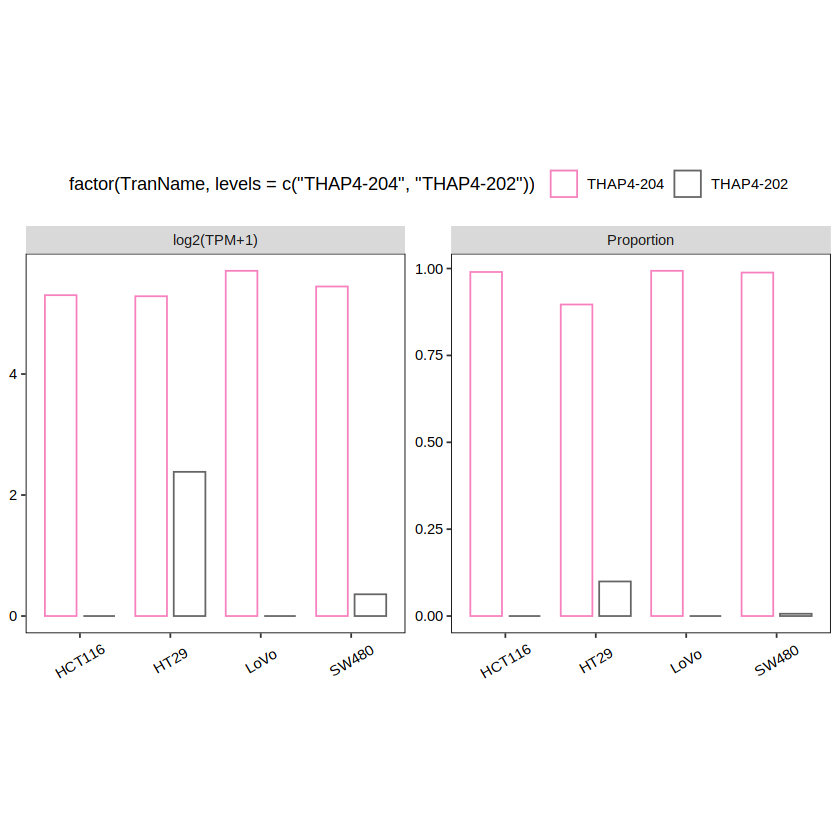

In [208]:
ggplot(
  df_cl %>% filter(TranName %in% c("THAP4-204", "THAP4-202")),
  aes(x = Cellline, y = value, color = factor(TranName, levels = c("THAP4-204", "THAP4-202")))
) +
  geom_bar(stat = "identity", position = position_dodge(0.85), fill = "white", width = 0.7) +
  scale_color_manual(values = rev(c("#4daf4a", "#377eb8", "#666666", "#f781bf"))) +
  facet_wrap(~variable, scales = "free") +
  mytheme +
  theme(aspect.ratio = 1, legend.position = "top", axis.title = element_blank(), axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))
ggsave(file = "02_barplot_THAP4_cellline.pdf", width = 4, height = 3)

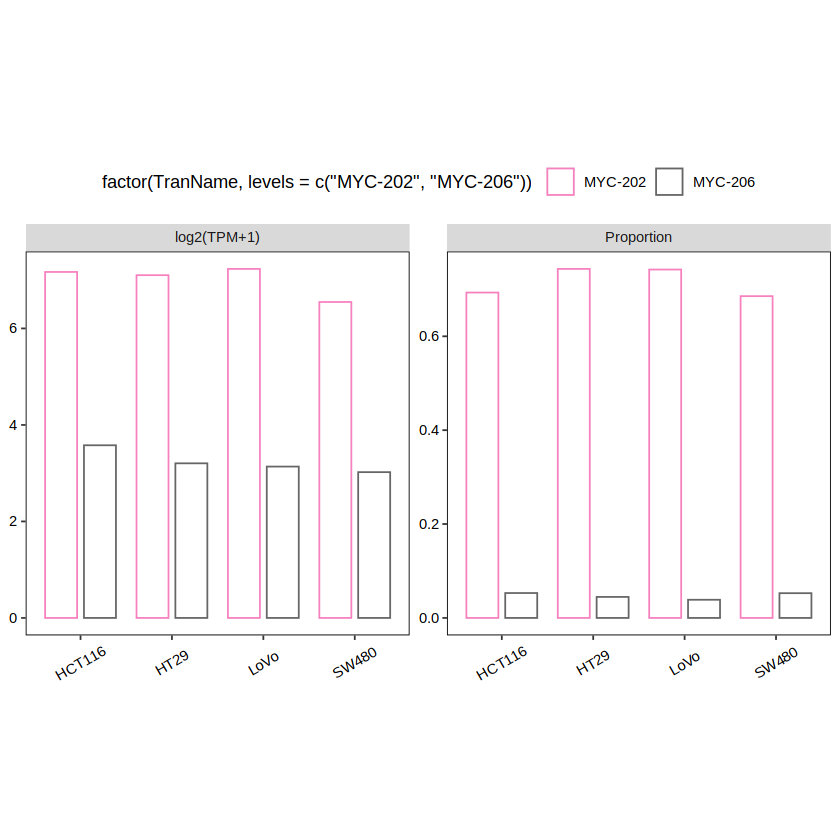

In [209]:
ggplot(
  df_cl %>% filter(TranName %in% c("MYC-202", "MYC-206")),
  aes(x = Cellline, y = value, color = factor(TranName, levels = c("MYC-202", "MYC-206")))
) +
  geom_bar(stat = "identity", position = position_dodge(0.85), fill = "white", width = 0.7) +
  scale_color_manual(values = rev(c("#4daf4a", "#377eb8", "#666666", "#f781bf"))) +
  facet_wrap(~variable, scales = "free") +
  mytheme +
  theme(aspect.ratio = 1, legend.position = "top", axis.title = element_blank(), axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))
ggsave(file = "02_barplot_MYC_cellline.pdf", width = 4, height = 3)

# IsoformSwitchAnalyzeR

In [136]:
ont <- readRDS(file = "/gpfs1/tangfuchou_pkuhpc/tangfuchou_cls/luping/project/ont_iso_crc/2_RNA_CRC/01_RNA_analysis/CRC_HTCRC_02_RNA_seurat/CRC_HTCRC_01_RNA_5400_3262_tx/00_tx_5400_3262_hvg1869_PC1_20.rds")

In [137]:
ne_cells <- (ont@meta.data %>% filter(celltype3 %in% "Stem/TA", data %in% "CRC"))$CellName
cc_cells <- (ont@meta.data %>% filter(celltype3 %in% "Stem/TA-like", data %in% "CRC"))$CellName

In [138]:
meta <- ont@meta.data[c(ne_cells, cc_cells), ]

In [139]:
# c('EWSR1-207','EWSR1-216','MYC-202','MYC-206','THAP4-204','THAP4-202')

In [140]:
tpm <- as.data.frame(read_csv("../../../CRC_HTCRC_01_RNA_QC/00_tx_tpm_qc_500_genenumbersgt0_5400_3262.csv"))
rownames(tpm) <- tpm[, 1]
tpm <- tpm[, c(ne_cells, cc_cells)]

New names:
• `` -> `...1`
Rows: 29429 Columns: 3263
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr    (1): ...1
dbl (3262): CRC01_L1_Barcode01, CRC01_L1_Barcode02, CRC01_L1_Barcode03, CRC0...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [141]:
test <- tpm
test$isoform_id <- rownames(test)
test <- test[, c("isoform_id", ne_cells, cc_cells)]

In [142]:
mmm <- data.frame(row.names = meta$CellName, sampleID = meta$CellName, condition = meta$patient, celltype3 = as.character(meta$celltype3))

In [12]:
step1 <- importRdata(
  isoformCountMatrix = test,
  # isoformRepExpression = isoformRepExpression,
  designMatrix = mmm,
  isoformExonAnnoation = "Plot.gtf"
)

Step 1 of 10: Checking data...

Warning message in importRdata(isoformCountMatrix = test, designMatrix = mmm, isoformExonAnnoation = "Plot.gtf"):
"The number of comparisons (n=36) is unusually high.
 - If this intended please note that with a large number of comparisons IsoformSwitchAnalyzeR might use quite a lot of memmory (aka running on a small computer might be problematic).
 - If this was not intended please check the supplied design matrixt to make sure no mistakes were made."
Please note that some condition names were changed due to names not suited for modeling in R.

Step 2 of 10: Obtaining annotation...

    importing GTF (this may take a while)...



In [141]:
# saveRDS(step1, file='step1.rds')

In [13]:
step1 <- readRDS(file = "step1.rds")

In [ ]:
step2 <- isoformSwitchTestSatuRn(step1, reduceToSwitchingGenes = FALSE)

In [143]:
saveRDS(step2, file = "step2.rds")

In [176]:
step2 <- readRDS(file = "step2.rds")

In [ ]:
step3 <- extractSequence(step2, genomeObject = Hsapiens, onlySwitchingGenes = FALSE, writeToFile = TRUE)

In [178]:
saveRDS(step3, file = "step3.rds")

In [145]:
step3 <- readRDS(file = "step3.rds")
# step3 <- readRDS(file='../../../00_PfamScan/step3.rds')

In [146]:
seqs <- readAAStringSet("isoformSwitchAnalyzeR_isoform_AA.fasta")
sequence_name <- c("EWSR1-207", "EWSR1-216", "MYC-202", "MYC-206", "THAP4-204", "THAP4-202")
length(sequence_name)
# sequence_name
sequence_name <- intersect(sequence_name, names(seqs))
# sequence_name
specific_sequence <- seqs[sequence_name]
writeXStringSet(specific_sequence, filepath = "isoformSwitchAnalyzeR_isoform_AA_filtered.fasta")

[1] 6

In [ ]:
# https://www.ebi.ac.uk/Tools/hmmer/search/hmmscan
step4 <- analyzePFAM(step3, pathToPFAMresultFile = "../../../00_PfamScan/pfam_scan_result.txt")

In [ ]:
saveRDS(step4, file = "step4.rds")

In [ ]:
switchPlotTranscript(step4, isoform_id = mytx) #+ theme(aspect.ratio=0.2)
ggsave(filename = sprintf("../02_RNA_seurat/04_RNA_2184_1395_DTU_StemTA/05_candidate_1/%s_%s_switchPlotTranscript.pdf", myrank, g), width = 10, height = length(mytx) * 1)

In [58]:
clas <- read.table(file = "../../../CRC_HTCRC_00_gene_isoform_info/00_corrected_ref_TranID_TranName_GeneName_structural_category.txt", header = T, sep = "\t")

In [61]:
seqs <- readAAStringSet("isoformSwitchAnalyzeR_isoform_AA.fasta")
sequence_name <- (clas %>% filter(GeneName %in% c("EIF4G1", "CTNNA1", "CD46", "CSDE1", "SURF4", "APH1A", "ARIH2", "COMT", "EWSR1", "RABAC1", "SLC25A22")))$TranName
length(sequence_name)
# sequence_name
sequence_name <- intersect(sequence_name, names(seqs))
# sequence_name
specific_sequence <- seqs[sequence_name]
writeXStringSet(specific_sequence, filepath = "isoformSwitchAnalyzeR_isoform_AA_filtered_1.fasta")

[1] 48

In [157]:
library(data.table)
pfam_results <- fread("isoformSwitchAnalyzeR_isoform_AA_filtered_1_hmmscan_tab.txt", header = FALSE, fill = TRUE, sep = "\t")
colnames(pfam_results) <- c(
  "Family id", "Family Accession", "tlen", "seq id", "#", "qlen", "E-value", "Bit Score", "bias", "#", "of", "Cond. E-value", "Ind. E-value", "score", "bias",
  "Model Start", "Model End", "Ali. Start", "Ali. End", "Env. Start", "Env. End", "acc", "Description"
)
# head(pfam_results,2)
pfam_results <- pfam_results[, c(
  "seq id", "Family id", "Family Accession", "tlen", "Env. Start", "Env. End", "Ali. Start", "Ali. End",
  "Model Start", "Model End", "Bit Score", "Ind. E-value", "Cond. E-value", "Description"
)]
pfam_results$`database significant` <- 1
pfam_results$`outcompeted` <- 0
pfam_results$`clan` <- "CLxxxx"

colnames(pfam_results) <- c(
  "seq id", "hmm name", "hmm acc", "hmm length", "envelope start", "envelope end", "alignment start", "alignment end",
  "hmm start", "hmm end", "bit score", "Individual E-value", "Conditional E-value", "Description", "database significant", "outcompeted", "clan"
)

pfam_results <- pfam_results[, c(
  "seq id", "alignment start", "alignment end", "envelope start", "envelope end", "hmm acc", "hmm name", "hmm start", "hmm end", "hmm length", "bit score",
  "Individual E-value", "Conditional E-value", "database significant", "outcompeted", "clan"
)]
write.table(pfam_results, file = "pfam_results.txt", sep = " ", quote = FALSE, row.names = FALSE, col.names = TRUE)
head(pfam_results, 2)

seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,hmm start,hmm end,hmm length,bit score,Individual E-value,Conditional E-value,database significant,outcompeted,clan
<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CSDE1-202,57,84,38,90,PF23456.1,CSDE1,52,78,84,429.3,7.7e-01,3.2e-04,1,0,CLxxxx
CSDE1-202,100,148,86,148,PF23456.1,CSDE1,37,84,84,429.3,4.5e-17,1.9e-20,1,0,CLxxxx


In [179]:
step4 <- analyzePFAM(step3, pathToPFAMresultFile = "pfam_results.txt")

Converting AA coordinats to transcript and genomic coordinats...



  |======================================================================| 100%


Added domain information to 35 (0.12%) transcripts



Omitting toplogy visualization as it has not been added. You can add this analysis through analyzeDeepTMHMM(). To avoid this message set "plotTopology=FALSE"



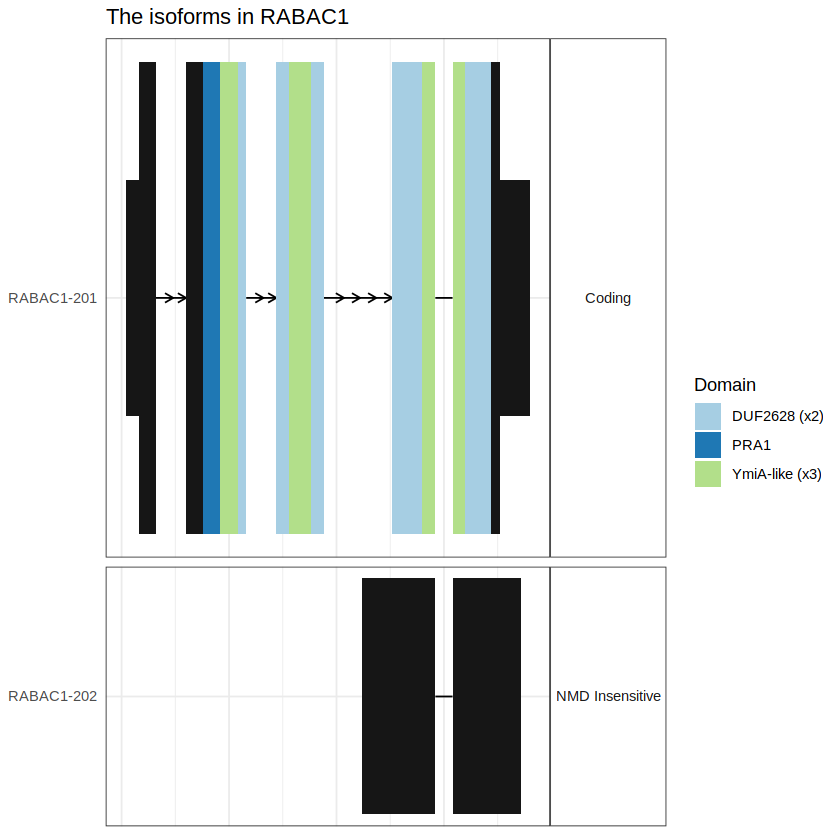

In [184]:
switchPlotTranscript(step4, isoform_id = c("RABAC1-201", "RABAC1-202")) #+ theme(aspect.ratio=0.2)

Omitting toplogy visualization as it has not been added. You can add this analysis through analyzeDeepTMHMM(). To avoid this message set "plotTopology=FALSE"



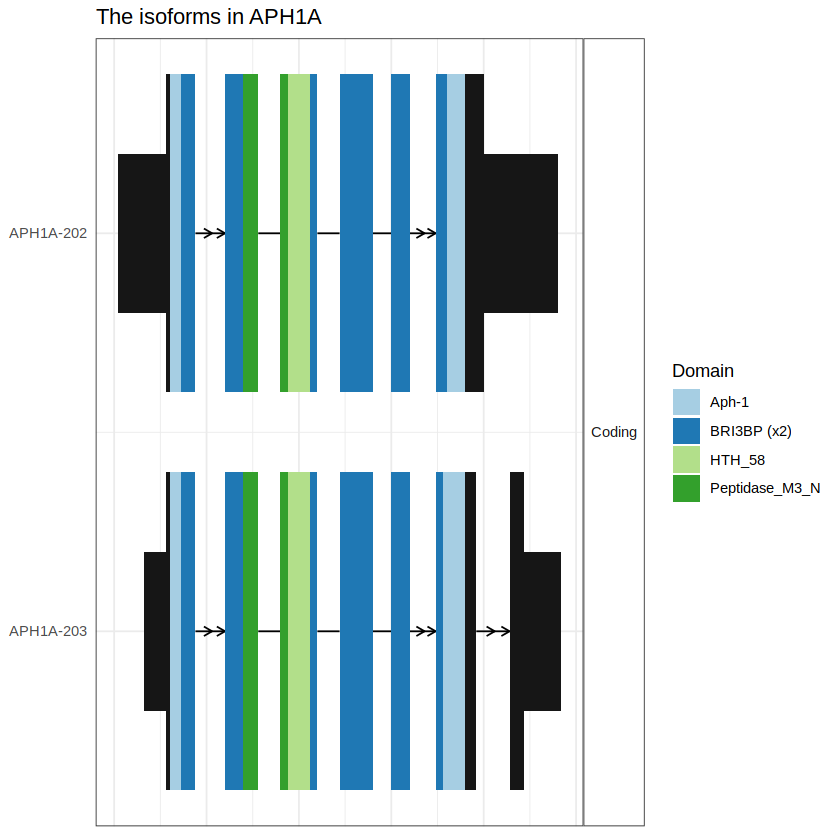

In [183]:
switchPlotTranscript(step4, gene = c("APH1A")) #+ theme(aspect.ratio=0.2)

# cell cycle

In [240]:
mycells <- (ont@meta.data %>% filter(patient %in% c(
  "CRC01", "CRC02", "CRC03", "CRC04", "CRC05", "CRC07", "CRC8", "CRC09", "CRC10"
), celltype3 %in% c("Stem/TA", "Stem/TA-like")))$CellName
length(mycells)

[1] 996

In [ ]:
tpm_gene <- read_csv(file = "../../../CRC_HTCRC_01_RNA_QC/00_gene_tpm_qc_500_genenumbersgt0_5400_3262.csv") %>% as.data.frame()
rownames(tpm_gene) <- tpm_gene[, 1]
tpm_gene$`...1` <- NULL
tpm_gene <- tpm_gene[, mycells]

In [243]:
# cell cycle
s_genes <- intersect(rownames(tpm_gene), cc.genes$s.genes)
length(s_genes)
g2m_genes <- intersect(rownames(tpm_gene), cc.genes$g2m.genes)
length(g2m_genes)
tpm_cy <- tpm_gene[c(s_genes, g2m_genes), ]

[1] 39

[1] 49

In [ ]:
tpm_tx <- read_csv(file = "../../../CRC_HTCRC_01_RNA_QC/00_tx_tpm_qc_500_genenumbersgt0_5400_3262.csv") %>% as.data.frame()
rownames(tpm_tx) <- tpm_tx[, 1]
tpm_tx$`...1` <- NULL
tpm_tx <- tpm_tx[, mycells]

In [257]:
df_cy <- rbind(
  cor(t(log1p(tpm_gene["THAP4", ])), t(log1p(tpm_cy)), use = "pairwise.complete.obs", method = "pearson"),
  cor(t(log1p(tpm_tx[c("THAP4-202", "THAP4-204"), ])), t(log1p(tpm_cy)), use = "pairwise.complete.obs", method = "pearson")
)
anno_col <- data.frame(row.names = c(s_genes, g2m_genes), class = c(rep("S", length(s_genes)), rep("G2M", length(g2m_genes))))

In [264]:
pheatmap(
  df_cy,
  cluster_cols = F, cluster_rows = F, annotation_col = anno_col, cellwidth = 9, cellheight = 9,
  color = colorRampPalette(rev(c("#ca0020", "#f4a582", "#f7f7f7", "#92c5de", "#0571b0")))(40), border_color = NA,
  breaks = seq(-quantile(df_cy, 0.99), quantile(df_cy, 0.99), length.out = 40),
  file = "pheatmap_cor_THAP4_cellcycle.pdf"
)